### Illustrate the zero forcing process on a grid graph

In [45]:
def zf_process(g, B):
    """
    Run the zero forcing process and return each step
    
    INPUT:
    
    - ``g`` -- simple graph;
    
    - ``B`` -- a list; the set of initial blue vertices;
    
    OUTPUT: a list of new blue vertices at each step.
    """
    again = True
    cb = copy(B) ### current blue vertices
    record = [copy(B)]
    forces = [[]]
    
    while again:
        again = False
        
        new_v = []
        new_f = []
        for v in cb:
            wb = [u for u in g.neighbors(v) if u not in cb]
            if len(wb) == 1:
                new_v.append(wb[0])
                new_f.append((v,wb[0]))
                again = True
        
        ### update and record
        if again:
            cb += new_v
            record.append(new_v)
            forces.append(new_f)
    
    return record, forces
    

In [46]:
g = graphs.CycleGraph(10)
B = [0,1]

In [47]:
zf_process(g, B)

([[0, 1], [9, 2], [8, 3], [7, 4], [6, 5]],
 [[], [(0, 9), (1, 2)], [(9, 8), (2, 3)], [(8, 7), (3, 4)], [(7, 6), (4, 5)]])

In [95]:
### a test of the process
m,n = 4,7 ### assume m < n

g = graphs.Grid2dGraph(4,7)
g_pos = g.get_pos()

B = [(i,0) for i in range(m)]
rec, forces = zf_process(g,B)

step = 4
lb = sum(rec[:step],[])
db = rec[step]
wh = [v for v in g.vertices() if v not in lb and v not in db]
c = {'lightblue': lb, 'blue': db, 'white': wh}

arrows = DiGraph([g.vertices(), forces[step]], pos=g_pos)

pic1 = g.plot(vertex_colors=c, vertex_labels=False)
pic2 = arrows.plot(vertex_labels=false, vertex_colors=c, edge_colors={'orange': arrows.edges(labels=False)})

new_pic = pic1 + pic2
new_pic.axes(False)
new_pic

LookupError: Vertex (-1) is not a vertex of the graph.

In [111]:
m,n = 4,7 ### assume m < n
size = [2*m, 2*n] ### size for figsize

g = graphs.Grid2dGraph(m,n)
g_pos = g.get_pos()

B = [(i,0) for i in range(m)]
rec, forces = zf_process(g,B)

pics = []

for step in range(len(rec)):
    lb = sum(rec[:step],[])
    db = rec[step]
    wh = [v for v in g.vertices() if v not in lb and v not in db]
    c = {'lightblue': lb, 'blue': db, 'white': wh}

    arrows = DiGraph([g.vertices(), forces[step]], pos=g_pos)

    g_pic = g.plot(figsize=size, 
                   vertex_colors=c, 
                   vertex_labels=False)
    g_pic += arrows.plot(figsize=size, 
                         vertex_labels=false, 
                         vertex_colors=c, 
                         edge_colors={'orange': arrows.edges(labels=False)})
    g_pic.axes(False)
    pics.append(g_pic)
    
### the final step: no more forces
lb = sum(rec,[]) 
wh = [v for v in g.vertices() if v not in lb]
c = {'lightblue': lb, 'white': wh}
final_state = g.plot(figsize=size, 
                     vertex_colors=c, 
                     vertex_labels=False)
pics.append(final_state)

Animation with 8 frames
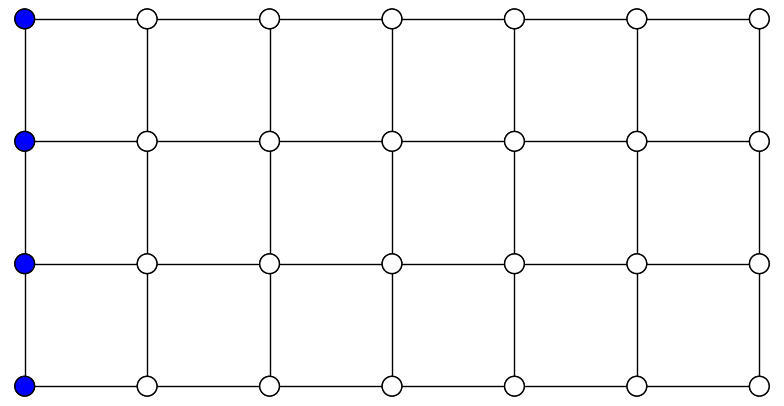

In [112]:
grid_animate = animate(pics)
grid_animate

In [113]:
grid_animate.save('grid_animate.gif', delay=50)

In [25]:
load("https://raw.githubusercontent.com/jephianlin/minimum_rank_aux/master/load_all.py");

Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.


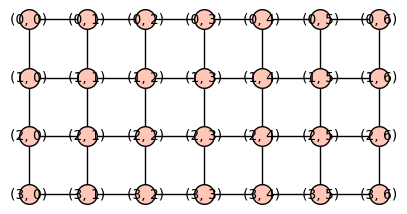

In [26]:
g.show()

In [27]:
find_gZ(g)

4